# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [25]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print(y_test[1])
print("Updated Image Shape: {}".format(X_train.shape))
print("Updated Image Shape: {}".format(y_train.shape))

1
Updated Image Shape: (39209, 32, 32, 3)
Updated Image Shape: (39209,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [26]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = 5

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

#TODO: Validation data
n_validation = len(X_train) * 0.2 // 1

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 5
Number of validation examples = 7841.0
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

class id 36


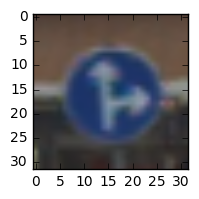

In [28]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline
index = random.randint(0, len(X_train))
image_sample = X_train[index].squeeze()
print("class id", y_train[index]) #check if the image with the right class_id
plt.figure(figsize = (2,2))
plt.imshow(image_sample)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
%matplotlib inline
from sklearn.utils import shuffle
import cv2

#shuffle image dataset
X_train, y_train = shuffle(X_train, y_train)

# index = random.randint(0, len(X_train))
# img = X_train[index].squeeze()
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# img[:,:,0] = cv2.equalizeHist(img[:,:,0])
# img_output = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.figure(figsize = (2,2))
# plt.imshow(img_output)

features = []

def preProcessed(image_Feature):
    
    #do the histogram equavalence
    for img in image_Feature:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img[:,:,0] = cv2.equalizeHist(img[:,:,0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        feature = np.array(img, dtype=np.float32)
        features.append(feature)
    print("Preprocessed image sucessfully!")
    return np.array(features)

print("Updated Image Shape: {}".format(X_train.shape))
X_train = preProcessed(X_train)
print("Updated Image Shape: {}".format(X_train.shape))


Updated Image Shape: (39209, 32, 32, 3)
Preprocessed image sucessfully!
Updated Image Shape: (39209, 32, 32, 3)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
    
- Firstly, I randomly shuffled the training images in order to prevent using training dataset with bias(since it originally may not randomly choose the data to train). 
- Secondly, I did histogram equalization on images in order to fix the images which are too dark to see.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
X_testing, y_testing = test['features'], test['labels']

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

- For the training and validation, I split 80% into training dataset, and the rest 20% into validation dataset in order to know the model classification accuracy rate. The training and validation data are from the same dataset.
- After getting the desired model, I use 4 new images which got from the Google street view and 1 new images I took from street in order to test the true accuracy rate.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#leNet
def leNet(x):
    mu = 0
    sigma = 0.1
    
    #Layer 1 : Convolutional layer
    conv1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6), mean = mu, stddev = sigma))
    convl_bias = tf.Variable(tf.zeros(6))
    convl = tf.nn.conv2d(x, conv1_weight, strides = [1,1,1,1], padding='VALID') + convl_bias
    
    #Activation
    convl = tf.nn.relu(convl)
    
    #Pooling
    convl = tf.nn.max_pool(convl, ksize=[1,2,2,1], strides = [1,2,2,1], padding='VALID')
    
    #Layer 2: Convolutional layer
    conv2_weight = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_bias = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(convl, conv2_weight, strides=[1,1,1,1], padding ='VALID') + conv2_bias
    
    #Activation purpose
    conv2 = tf.nn.relu(conv2)
    
    #For Pooling 
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
    
    #Flatten for later fully connected layer
    fc0 = tf.contrib.layers.flatten(conv2)
    
    #Layer3: Fully connected layer
    fc1_weight = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fcl_bias = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_weight) + fcl_bias
    
    #Activation purpose 
    fc1 = tf.nn.relu(fc1)
    
    #Layer 4: Fully connected layer
    fc2_weight = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias

    #Activation purpose
    fc2 = tf.nn.relu(fc2)
    
    #Layer 5: Fully connected layer
    fc3_weight = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    fc3 = tf.matmul(fc2, fc3_weight) + fc3_bias   

    return fc3

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
    
- This training model's architecture is based on the famous LeNet architecture. The reason to choose convolutional neural network is becasue it is good for images with 3D parameter(width, height, channels). With five layers of deep learning neural network, and two Convolutional layers in the beginning, and have three fully connected layers following.
    
- The size of the first layers is width/height: (32 - 5 + 2 * 1)/1 + 1 = 30, and the depth is 6, so the first layers output size is 30x30x6. Therefore, the total parameter(without parameter sharing) in the first layers is (5*5*3)*(30*30*6) = 405000. 
    
- The activation relu is to make it as non-linear function in order to deal with more complicated problems. It followed by the pooling layer in order to reduce the the size of the output and prevent overfitting. After the pooling layers the output size is: width/height: (30 - 2) / 2 + 1 = 15, depth remains the same as 6. Therefore, the output size is: 15x15x6. 
    
- The second convolutional layers width/height: (15 - 5 + 2 * 1) / 1 + 1 = 12, so the second convolutional layers output size is 12x12x16. Therefore, the total parameters(without parameter sharing) of the second layers is (5*5*6)*(12*12*16) = 345600. 
    
- The pooling layers output width/height is: (12 - 2)/ 2 + 1 = 6, and the depth is 16. Therefore, pooling the output size is: 6x6x16. 
    
- After convolutional and pooling layers, it needs a flatten layers to make it from 3D to 1D. The output of the first fully connected layers is 120. Second fully connected layers is 84. The final fully connected layers will need to be 43 which is the total classification classes.

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
EPOCHS = 11
BATCH_SIZE = 130

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#training pipeline
rate = 0.001
logits = leNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#evaluate model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

#evaluation model to see the model accuracy rate
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#train the model
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print('Training...')
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        testing_accuracy = evaluate(X_testing, y_testing)
        print("EPOCH {} ....".format(i + 1))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print("Testing accuracy = {:.3f}".format(testing_accuracy))        
        print()

    saver.save(sess, 'lenet')
    print('Model trained and saved successfully')


Training...

EPOCH 1 ....
Validation accuracy = 0.499
Testing accuracy = 0.378

EPOCH 2 ....
Validation accuracy = 0.738
Testing accuracy = 0.622

EPOCH 3 ....
Validation accuracy = 0.834
Testing accuracy = 0.733

EPOCH 4 ....
Validation accuracy = 0.870
Testing accuracy = 0.762

EPOCH 5 ....
Validation accuracy = 0.891
Testing accuracy = 0.788

EPOCH 6 ....
Validation accuracy = 0.892
Testing accuracy = 0.803

EPOCH 7 ....
Validation accuracy = 0.911
Testing accuracy = 0.825

EPOCH 8 ....
Validation accuracy = 0.929
Testing accuracy = 0.832

EPOCH 9 ....
Validation accuracy = 0.934
Testing accuracy = 0.850

EPOCH 10 ....
Validation accuracy = 0.919
Testing accuracy = 0.827

EPOCH 11 ....
Validation accuracy = 0.928
Testing accuracy = 0.851

Model trained and saved successfully


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- The batch size I used 130 bacause the bigger size of batch may get the better validation accuracy quickly. 
- For learning rate, I choose 0.001 since it is the perfect rate for training a model.
- For the Epochs, I found that if too many epochs, the model accuracy rate may stay or decrease. In addition, it may take too much time to train. Therefore, I choose 11 epochs since the validation rate has been already achieves 92.8%, and the testing accuracy also acheives 85.1%.
- For the optimizer, I choose to use Adam Optimizer since it is good for training a model for traffic sign.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

- The reason why I choose LeNet is bacause it is easy to implement, and LeNet is good for general traffic sign classification based on my experiment. In the beginning, I tried to do some image preprocessing such as using canny or grey scale. However, I found that it is even hard to recoginze these images for me after I did these image preprocessing. I think it is bacause using canny or grey scale preprocessing may make the images lose some of their features. Besides, I also noticed that some images are really dark, and it makes me really hard to recognize sometimes. Therefore, I did histogram equavalance for image preprocessing to make it brighter. 
- In addition, the reason I decide to set my epochs to 11 because I found that after 11 epochs, the accuracy of the model seems not increase a lot but it takes too much time. 
- Learning rate set to 0.001 is also a good starting point to train a neural network.
- For the architecture, the reason to choose convolutional neural network is bacause it is good for training images which have three dimensions (width, height, depth). The usage of pooling layers is to reduce the parameters and prevent overfitting. In addition, the activation layers use relu to make it as non-linear function in order to deal with more complex images.
- For testing images, I got different test image (which is not from the training dataset) from the Google street view and also my camera. It still can achieve 80% accuracy rate. So I think it is good after all it acheive 80%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Updated Image Shape: (32, 32, 3)
Updated Image Shape: (32, 32, 3)
Updated Image Shape: (32, 32, 3)
Updated Image Shape: (32, 32, 3)
Updated Image Shape: (32, 32, 3)
Updated Image Shape: (5, 32, 32, 3)


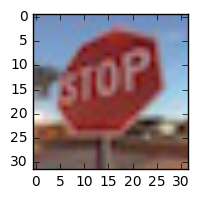

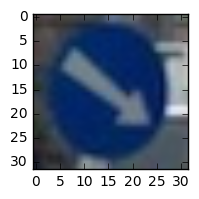

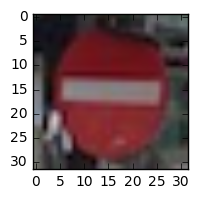

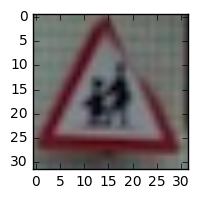

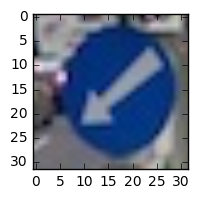

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
%matplotlib inline
import cv2
import numpy as np
from IPython.display import Image
import matplotlib.image as mpimg
from scipy import misc

NUM_IMG = 5
img1 = cv2.imread("img/stop.png")
img2 = cv2.imread("img/keepright.png")
img3 = cv2.imread("img/notenter.png")
img4 = cv2.imread("img/childcrossing.png")
img5 = cv2.imread("img/keepleft.png")
rgb_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
rgb_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
rgb_img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
rgb_img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
imgArr = np.array([rgb_img1, rgb_img2, rgb_img3, rgb_img4, rgb_img5])
plt.figure(figsize = (2,2))
plt.imshow(rgb_img1)
plt.figure(figsize = (2,2))
plt.imshow(rgb_img2)
plt.figure(figsize = (2,2))
plt.imshow(rgb_img3)
plt.figure(figsize = (2,2))
plt.imshow(rgb_img4)
plt.figure(figsize = (2,2))
plt.imshow(rgb_img5)
print("Updated Image Shape: {}".format(img1.shape))
print("Updated Image Shape: {}".format(img2.shape))
print("Updated Image Shape: {}".format(img3.shape))
print("Updated Image Shape: {}".format(img4.shape))
print("Updated Image Shape: {}".format(img5.shape))
print("Updated Image Shape: {}".format(imgArr.shape))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
- The qualities of the traffic sign should at least light enough. Otherwise, it may decrease the classification rate.
- In addition, if the image is taken from the side direction, it may also decrease the accuracy rate.
- Low resolution may also cause bad classification

In [9]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
TEST_BATCH_SIZE = 5
testArr = np.array([14, 38, 17, 28, 39])#the right classification value for each images

#testing method
def testing_evaluate(X_data, y_data):
    num_examples = len(X_data)
    sum_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, TEST_BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + TEST_BATCH_SIZE], y_data[offset:offset+ TEST_BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        sum_accuracy += (accuracy * len(batch_x))
    return sum_accuracy / num_examples

#predict the testing imgage result
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph("leNet.meta")
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = testing_evaluate(imgArr, testArr)
    print(new_saver)
    print("Test Accuracy = {:.3f}".format(test_accuracy))



Test Accuracy = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
- It seems like it can not perform equally well on capture pictures to testing on dataset. I guess the reason is that the training dataset may standardize those image data beforehand.
- For other reasons is that I want to see the limitation of my trained model. I took images more unclear or more variance.
- Or maybe the test data is not large enough to show the real accuracy rate for this model

In [11]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import numpy as np
# x = tf.placeholder(tf.float32, (None, (32*32*3)))
# np.reshape(imgArr, (-1, 32*32*3))
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    softmax_output = sess.run(softmax, feed_dict = {x: imgArr})
    print(softmax_output)
    topk_3 = sess.run(tf.nn.top_k(tf.constant(softmax_output), k=3))
    print(topk_3)

[[  3.50328456e-14   2.05354156e-09   1.34247848e-08   8.05416462e-08
    2.59898769e-08   2.06361772e-08   2.24823242e-12   2.90245138e-04
    8.48887116e-02   6.84922535e-11   2.76349095e-08   3.20040679e-13
    3.06434995e-05   7.00853050e-01   2.16712897e-06   4.14377018e-06
    1.21922134e-14   1.11584500e-11   6.43874842e-10   6.02254031e-16
    1.02903019e-10   3.90139835e-17   7.51173901e-10   8.71216131e-13
    4.12777560e-18   7.74497133e-10   2.24800534e-08   1.48802118e-20
    9.68091384e-13   3.96457207e-11   6.11894484e-16   1.95360519e-18
    2.59362469e-08   1.26764498e-04   4.94255079e-03   2.08857372e-01
    2.19010801e-08   3.30195519e-07   2.47036880e-08   6.67979821e-12
    3.83864517e-06   5.83330923e-15   4.41282744e-09]
 [  2.49483462e-23   3.04366784e-16   3.10974276e-16   1.62462044e-17
    6.67124514e-18   1.30093320e-20   1.42459268e-22   4.46051933e-24
    1.64099136e-22   1.12753947e-21   2.14496019e-18   3.91736098e-21
    1.31823498e-17   8.93609807e-20 

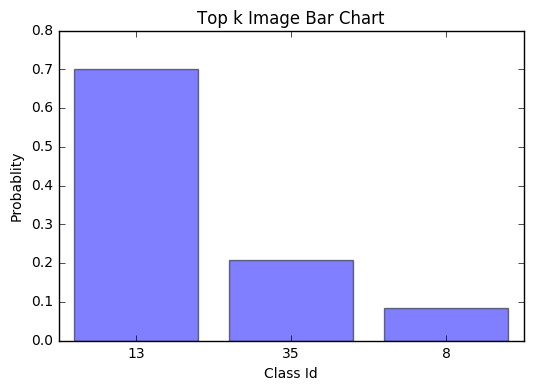

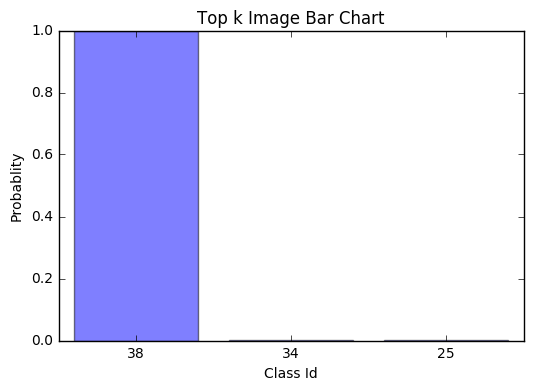

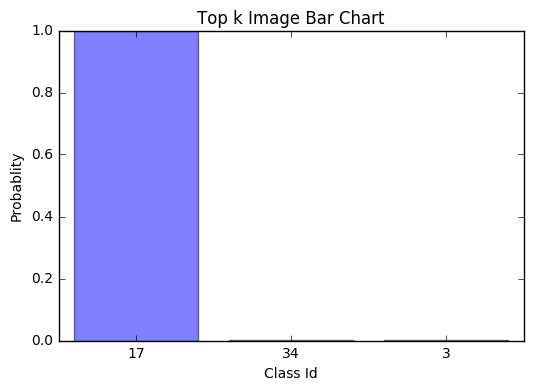

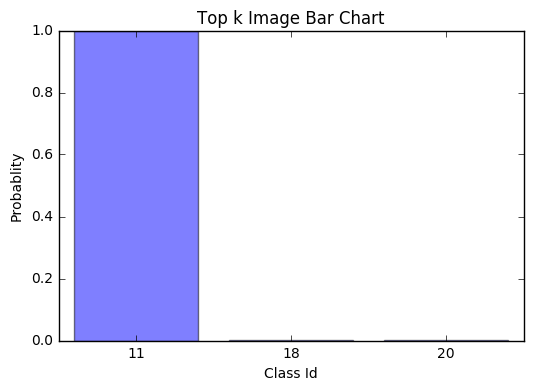

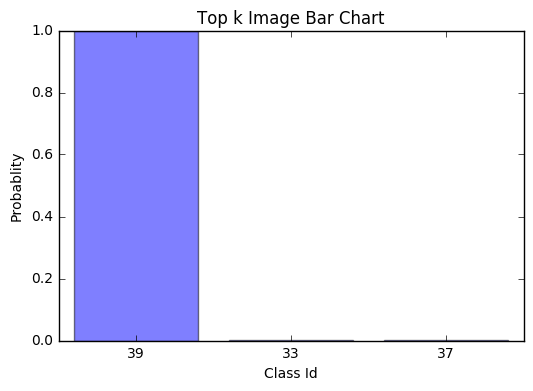

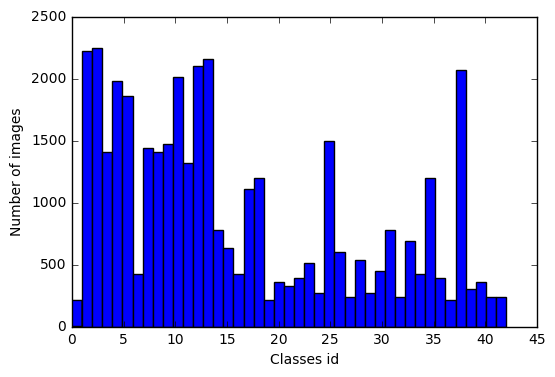

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# print(topk_3[0][0])
# print(topk_3[1][0])

def plotSoftmax(topk3_arr):
    for i in range(len(topk_3[0])):
        topk_np = np.array(topk_3[0][i])
        topk_class = (topk_3[1][i][0], topk_3[1][i][1], topk_3[1][i][2])
        y_axis = np.arange(len(topk_class))
        topk_value = topk_3[0][i]
        plt.bar(y_axis, topk_value, align='center', alpha=0.5)
        plt.xticks(y_axis, topk_class)
        plt.ylabel('Probablity')
        plt.xlabel('Class Id')
        plt.title('Top k Image Bar Chart')
        plt.show() 
plotSoftmax(topk_3)

plt.ylabel('Number of images')
plt.xlabel('Classes id')
plt.hist(train['labels'], bins = n_classes)
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
- For the correct classification images, they all have the highest probablity on the right class_id. However, for the other wrong classification images, the all top 3 probablity do not have the correct prediction. 
- In my opinions, this model is certain of the traffic sign which has more training data with the corresponding labels. However, it is uncertain of some more complicated traffic sign or the images with the less training dataset.
- For the wrong prediction, I think the reasons are less training dataset in those certain categories or maybe some overfitting issue.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
Reference:
    - LeNet architecture
    - Udacity labs, lectures and course notes
    - Udacity forum